<a href="https://colab.research.google.com/github/SimreAniri/Neural-Networks/blob/master/Lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Concatenate

from tensorflow.keras.utils import plot_model 

In [15]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True
num_predictions = 20

In [41]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [42]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Instructions for updating:
Please use Model.fit, which supports generators.
313/313 [==============================] - 1s 3ms/step - loss: 1.5744 - accuracy: 0.4258
Test loss: 1.5744216442108154
Test accuracy: 0.42579999566078186


Для начала увеличим количество эпох:

In [7]:
epochs = 5

model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5850 - accuracy: 0.4210 - val_loss: 1.4397 - val_accuracy: 0.4759
Epoch 2/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4615 - accuracy: 0.4693 - val_loss: 1.2812 - val_accuracy: 0.5450
Epoch 3/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3766 - accuracy: 0.5057 - val_loss: 1.2385 - val_accuracy: 0.5579
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3000 - accuracy: 0.5383 - val_loss: 1.1719 - val_accuracy: 0.5942
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.1319 - accuracy: 0.5945
Test loss: 1.1318861246109009
Test accuracy: 0.5945000052452087


Точность увеличилась

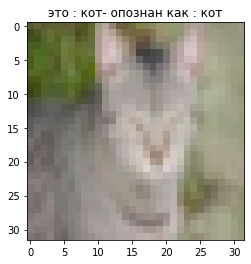

In [19]:
N = 320
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Попробуем сделать несколько нитей с ядрами разных размеров:

In [51]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x11)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
first = Dropout(0.25)(x11)


second_input = Input(shape=x_train.shape[1:])
x22 = Conv2D(32, (3, 3), padding='same', activation='relu')(second_input)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (3, 3), padding='same', activation='relu')(x22)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
second = Dropout(0.25)(x22)

merge_one = Concatenate()([first, second])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=[first_input, second_input], outputs=x)

In [52]:
# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

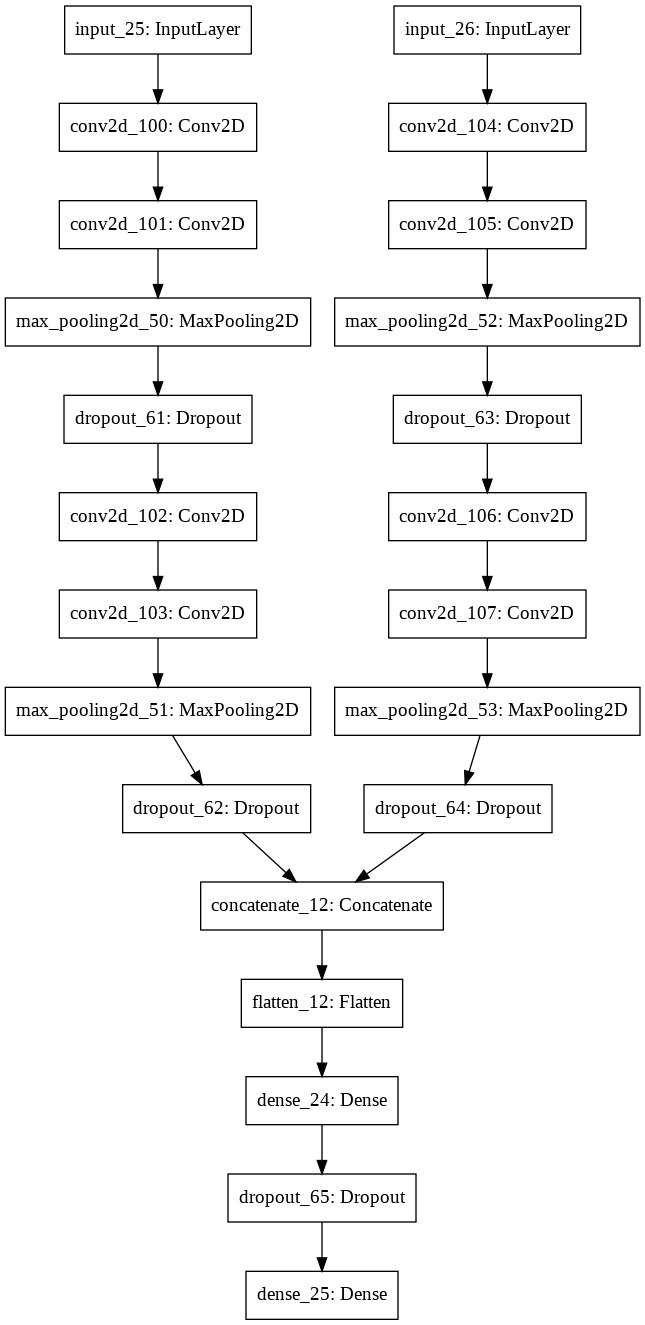

In [53]:
plot_model(model2, 'model2.png')

In [54]:
if not data_augmentation:
    print('Не используется data augmentation')
    model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Использование data augmentation в реальном времени
Epoch 1/5


AssertionError: ignored